##EXTRAÇÃO

In [222]:
import pandas as pd

In [223]:
df = pd.read_json('/content/drive/MyDrive/TelecomX_Data.json')

In [224]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


##TRANSFORMAÇÃO

separando os dados aninhados

In [225]:
df_customer = pd.json_normalize(df['customer'])
df = pd.concat([df.drop('customer', axis=1), df_customer], axis=1)

df_phone = pd.json_normalize(df['phone'])
df = pd.concat([df.drop('phone', axis=1), df_phone], axis=1)

df_internet = pd.json_normalize(df['internet'])
df = pd.concat([df.drop('internet', axis=1), df_internet], axis=1)

df_account = pd.json_normalize(df['account'])
df = pd.concat([df.drop('account', axis=1), df_account], axis=1)
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [226]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
duplicate_rows = df.duplicated()

print("Duplicate Rows:")
print(df[duplicate_rows])

Duplicate Rows:
Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]


In [227]:
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


padronização dos nomes das colunas

In [228]:
df.columns = df.columns.str.lower().str.replace('.', '_')
df.columns

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges_monthly',
       'charges_total'],
      dtype='object')

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   seniorcitizen     7267 non-null   int64  
 4   partner           7267 non-null   object 
 5   dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   phoneservice      7267 non-null   object 
 8   multiplelines     7267 non-null   object 
 9   internetservice   7267 non-null   object 
 10  onlinesecurity    7267 non-null   object 
 11  onlinebackup      7267 non-null   object 
 12  deviceprotection  7267 non-null   object 
 13  techsupport       7267 non-null   object 
 14  streamingtv       7267 non-null   object 
 15  streamingmovies   7267 non-null   object 
 16  contract          7267 non-null   object 


Análise Descritiva

In [230]:
analise_descritiva = df.describe(include='all')
analise_descritiva

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,6531
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,NaN,11
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,NaN
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,NaN


como a variael churn está distrubuída entre os clientes

In [231]:
df['churn'].value_counts()

,count
churn,
No,5174
Yes,1869
,224


In [232]:
df['churn'].value_counts(normalize=True)*100

,proportion
churn,
No,71.198569
Yes,25.719004
,3.082427


In [233]:
df['churn'] = df['churn'].str.strip()
df['churn'] = df['churn'].replace('', None)
df = df.dropna(subset=['churn'])

In [234]:
df = df.copy()

df.loc[:, 'charges_total'] = pd.to_numeric(
    df['charges_total'],
    errors='coerce'
)

df.loc[:, 'charges_monthly'] = pd.to_numeric(
    df['charges_monthly'],
    errors='coerce'
)

df.loc[:, 'tenure'] = pd.to_numeric(
    df['tenure'],
    errors='coerce'
)

In [235]:
churn_por_contrato = df.groupby(['contract','churn']).size().unstack(fill_value=0)
churn_por_contrato.columns.name = None
churn_por_contrato

,No,Yes
contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [236]:
porcentagem = churn_por_contrato.div(churn_por_contrato.sum(axis=1), axis=0)*100
porcentagem

,No,Yes
contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


In [237]:
import matplotlib.pyplot as plt


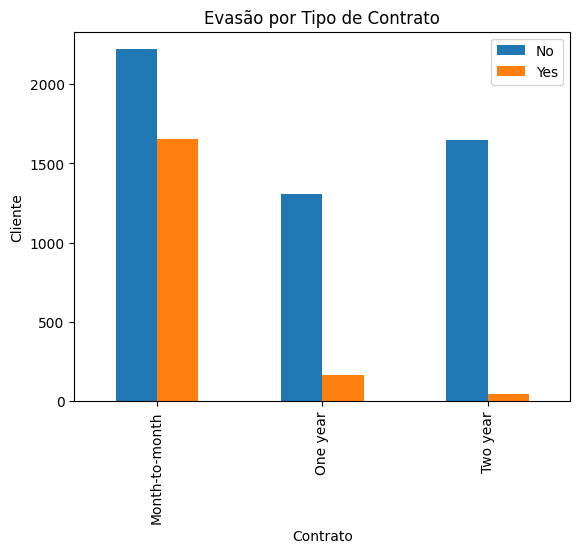

In [238]:
churn_por_contrato.plot(kind='bar')

plt.title('Evasão por Tipo de Contrato')
plt.xlabel('Contrato')
plt.ylabel('Cliente')
plt.show()

In [239]:
df.groupby('churn')['charges_monthly'].mean()

,charges_monthly
churn,
No,61.265124
Yes,74.441332


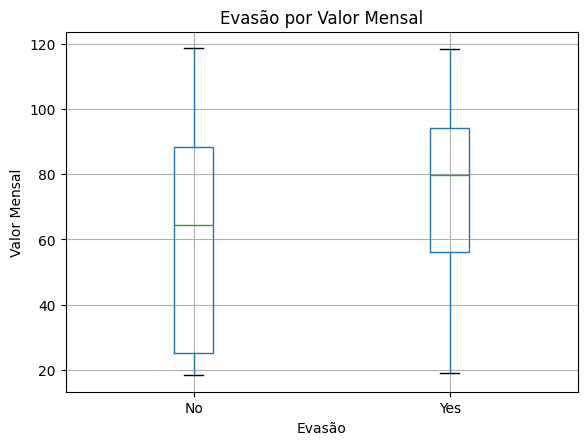

In [240]:
df.boxplot(column='charges_monthly', by='churn')

plt.title('Evasão por Valor Mensal')
plt.suptitle('')
plt.xlabel('Evasão')
plt.ylabel('Valor Mensal')

plt.show()

Contagem de Evasão por Variáveis Categóricas

In [241]:
def churn_por_categoria(coluna):
    tabela = pd.crosstab(df[coluna], df['churn'])

    porcentagem = tabela.div(tabela.sum(axis=1), axis=0)*100

    print("Quantidade:")
    display(tabela)

    print("\nPorcentagem:")
    display(porcentagem.round(2))

    porcentagem['Yes'].sort_values(ascending=False).plot(kind='bar')

    plt.title(f'Evasão por {coluna}')
    plt.ylabel('Porcentagem de Evasão')
    plt.xlabel(coluna)

    plt.show()

Quantidade:


churn,No,Yes
gender,,
Female,2549,939
Male,2625,930



Porcentagem:


churn,No,Yes
gender,,
Female,73.08,26.92
Male,73.84,26.16


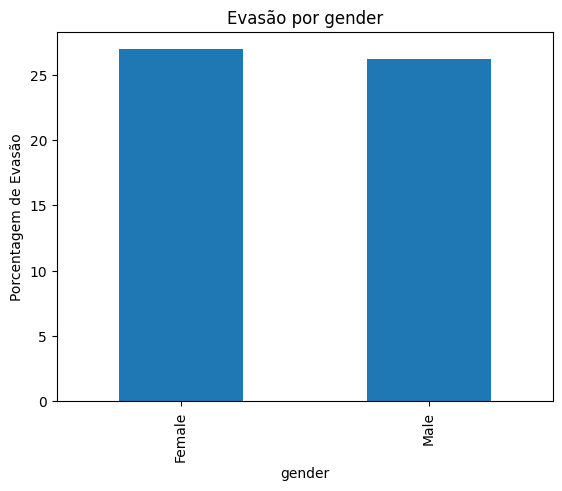

In [242]:
churn_por_categoria('gender')

Quantidade:


churn,No,Yes
contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48



Porcentagem:


churn,No,Yes
contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83


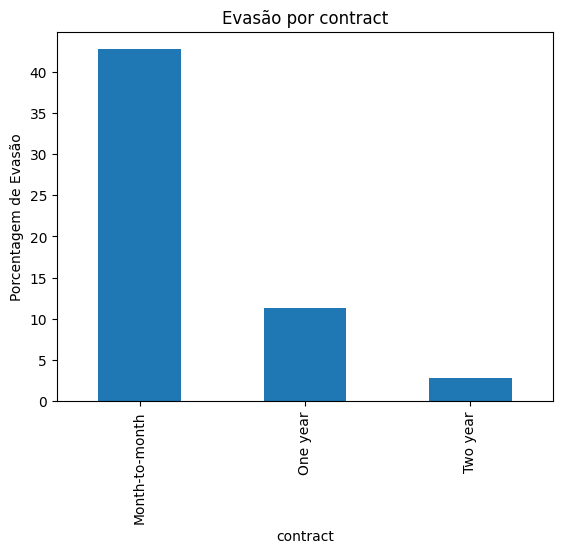

In [243]:
churn_por_categoria('contract')

Quantidade:


churn,No,Yes
paymentmethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308



Porcentagem:


churn,No,Yes
paymentmethod,,
Bank transfer (automatic),83.29,16.71
Credit card (automatic),84.76,15.24
Electronic check,54.71,45.29
Mailed check,80.89,19.11


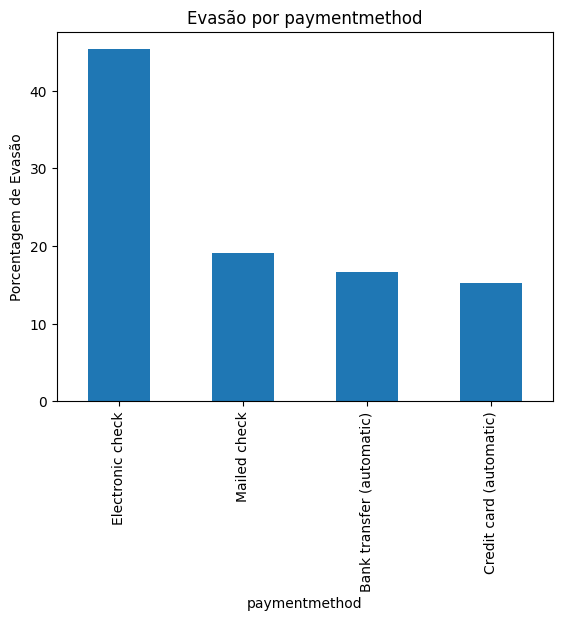

In [244]:
churn_por_categoria('paymentmethod')

Quantidade:


churn,No,Yes
internetservice,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113



Porcentagem:


churn,No,Yes
internetservice,,
DSL,81.04,18.96
Fiber optic,58.11,41.89
No,92.60,7.40


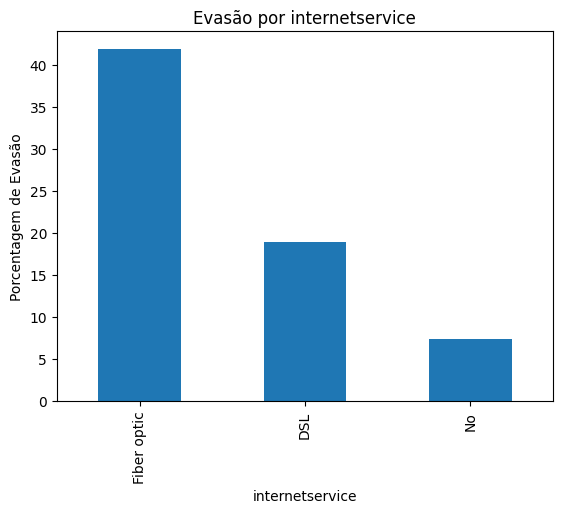

In [245]:
churn_por_categoria('internetservice')

Quantidade:


churn,No,Yes
paperlessbilling,,
No,2403,469
Yes,2771,1400



Porcentagem:


churn,No,Yes
paperlessbilling,,
No,83.67,16.33
Yes,66.43,33.57


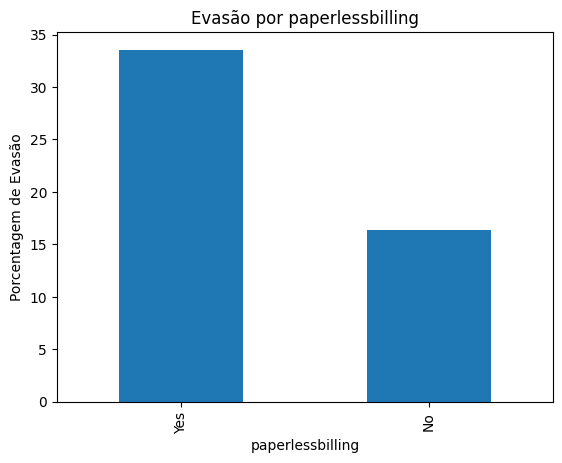

In [246]:
churn_por_categoria('paperlessbilling')

Quantidade:


churn,No,Yes
techsupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310



Porcentagem:


churn,No,Yes
techsupport,,
No,58.36,41.64
No internet service,92.60,7.40
Yes,84.83,15.17


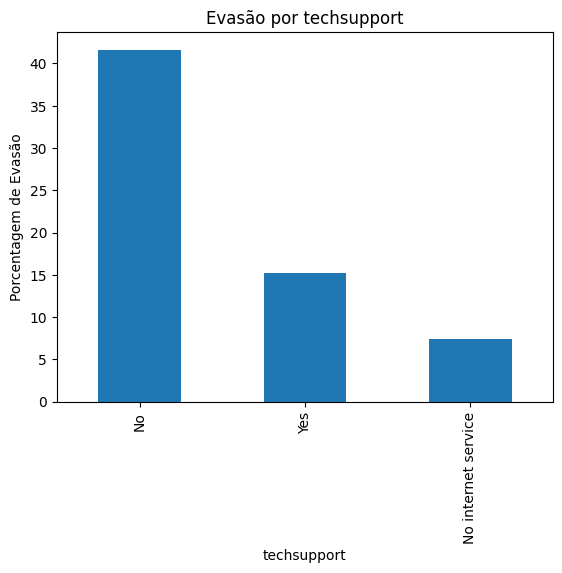

In [247]:
churn_por_categoria('techsupport')

Clientes com contrato mensal possuem maior taxa de churn.

Clientes com pagamento via electronic check cancelam mais.

Clientes sem suporte técnico apresentam maior evasão.

O gênero não apresentou influência significativa no churn.

Contagem de Evasão por Variáveis Numéricas

In [248]:
import seaborn as sns

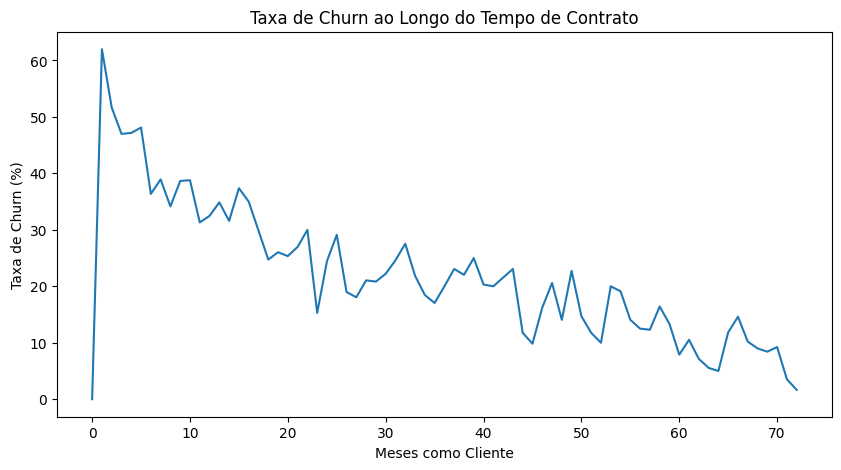

In [249]:
churn_tenure = pd.crosstab(df['tenure'], df['churn'], normalize='index') * 100
churn_tenure = churn_tenure.reset_index()

plt.figure(figsize=(10,5))

sns.lineplot(data=churn_tenure, x='tenure', y='Yes')

plt.title('Taxa de Churn ao Longo do Tempo de Contrato')
plt.xlabel('Meses como Cliente')
plt.ylabel('Taxa de Churn (%)')

plt.show()

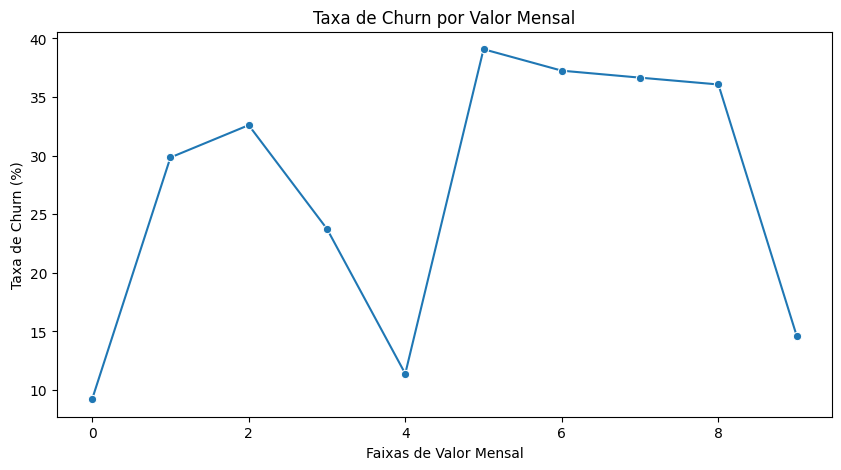

In [250]:
df.loc[:, 'faixa_valor_mensal'] = pd.cut(df['charges_monthly'], bins=10)

churn_mensal = pd.crosstab(
    df['faixa_valor_mensal'],
    df['churn'],
    normalize='index'
) * 100

churn_mensal = churn_mensal.reset_index()

churn_mensal['ordem'] = range(len(churn_mensal))

plt.figure(figsize=(10,5))

sns.lineplot(
    data=churn_mensal,
    x='ordem',
    y='Yes',
    marker='o'
)

plt.title('Taxa de Churn por Valor Mensal')
plt.xlabel('Faixas de Valor Mensal')
plt.ylabel('Taxa de Churn (%)')

plt.show()

In [252]:
df = df.copy()

df.loc[:, 'charges_total'] = pd.to_numeric(
    df['charges_total'],
    errors='coerce'
)

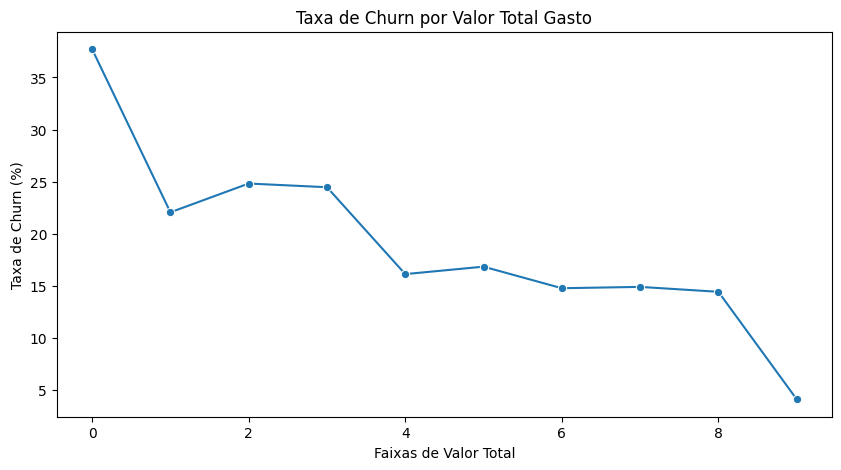

In [253]:
df.loc[:, 'faixa_charges_total'] = pd.cut(df['charges_total'], bins=10)

churn_total = pd.crosstab(
    df['faixa_charges_total'],
    df['churn'],
    normalize='index'
) * 100

churn_total = churn_total.reset_index()

churn_total['ordem'] = range(len(churn_total))

plt.figure(figsize=(10,5))

sns.lineplot(
    data=churn_total,
    x='ordem',
    y='Yes',
    marker='o'
)

plt.title('Taxa de Churn por Valor Total Gasto')
plt.xlabel('Faixas de Valor Total')
plt.ylabel('Taxa de Churn (%)')

plt.show()

A taxa de churn é maior nos primeiros meses de contrato.

Clientes com mensalidades mais altas apresentam maior evasão.

Clientes com menor valor total gasto apresentam maior taxa de churn.

##**RELATÓRIO FINAL**

## 📊 Relatório - Análise de Evasão de Clientes (Churn)

### 1. Introdução

Este projeto tem como objetivo analisar os dados de clientes da Telecom X para entender os fatores relacionados à evasão de clientes (Churn).

A empresa enfrenta um alto índice de cancelamentos e precisa identificar padrões que ajudem a compreender o comportamento dos clientes que cancelam o serviço. A partir dessa análise, será possível apoiar a equipe de Data Science no desenvolvimento de modelos preditivos e estratégias de retenção.

A análise foi realizada utilizando Python e bibliotecas de análise de dados, incluindo Pandas, Matplotlib e Seaborn.

---

## 2. Limpeza e Tratamento de Dados

Os dados foram obtidos por meio de uma API e passaram por um processo de ETL (Extração, Transformação e Carga).

Durante essa etapa foram realizadas as seguintes ações:

* Importação dos dados para um DataFrame do Pandas
* Padronização dos nomes das colunas
* Conversão de variáveis numéricas para o formato correto
* Verificação de valores ausentes
* Remoção de registros incompletos na variável **churn**
* Limpeza de valores vazios e inconsistentes
* Conversão da coluna **charges_total** para formato numérico

Esses procedimentos garantiram maior qualidade e confiabilidade para a análise dos dados.

---

## 3. Análise Exploratória de Dados (EDA)

A análise exploratória foi realizada para identificar padrões e possíveis fatores associados ao churn.

### 3.1 Análise Geral

A base de dados possui aproximadamente **7 mil clientes** com informações demográficas, serviços contratados e valores pagos.

A maioria dos clientes:

* Não cancelou o serviço
* Possui contrato mensal
* Utiliza faturamento digital
* Utiliza pagamento por electronic check

---

### 3.2 Análise por Variáveis Categóricas

Foram analisadas variáveis categóricas como:

* Gênero
* Tipo de contrato
* Método de pagamento
* Tipo de internet
* Suporte técnico

Os principais resultados observados foram:

* Clientes com contrato **Month-to-month apresentam maior taxa de churn**
* Clientes com pagamento via **Electronic check possuem maior evasão**
* Clientes sem **suporte técnico cancelam mais**
* Clientes com internet **Fiber optic apresentam maior taxa de churn**
* O **gênero não apresentou impacto significativo** no churn

Os gráficos apresentados mostram claramente as diferenças nas taxas de evasão entre as categorias analisadas.

---

### 3.3 Análise por Variáveis Numéricas

Também foram analisadas variáveis numéricas importantes:

* Tempo de contrato (tenure)
* Valor mensal (charges_monthly)
* Total gasto (charges_total)

Os gráficos mostraram que:

* Clientes com menor tempo de contrato apresentam maior churn
* Clientes com valores mensais maiores apresentam maior evasão
* Clientes com menor total gasto apresentam maior taxa de cancelamento

A análise mostrou que os primeiros meses de contrato são críticos para a retenção de clientes.

---

## 4. Conclusões e Insights

A análise permitiu identificar fatores importantes relacionados à evasão de clientes.

Os principais insights foram:

* Clientes com contrato mensal possuem maior probabilidade de cancelar
* Clientes novos apresentam maior taxa de churn
* Valores mensais mais altos estão associados a maior evasão
* Clientes com menor tempo de permanência cancelam mais
* Clientes sem suporte técnico apresentam maior risco de churn
* Método de pagamento electronic check está associado a maior evasão

Esses resultados indicam que a evasão ocorre principalmente entre clientes novos e com contratos mais flexíveis.

---

## 5. Recomendações

Com base na análise realizada, algumas ações podem ajudar a reduzir a evasão de clientes:

### 1️⃣ Incentivar contratos de longo prazo

Clientes com contratos anuais apresentam menor churn. A empresa pode oferecer descontos ou benefícios para incentivar contratos mais longos.

### 2️⃣ Melhorar a retenção nos primeiros meses

Os primeiros meses apresentam maior risco de cancelamento. Programas de acompanhamento de novos clientes podem reduzir a evasão.

### 3️⃣ Revisar estratégias de preço

Clientes com valores mensais mais altos apresentam maior taxa de churn. Pode ser interessante avaliar planos mais acessíveis.

### 4️⃣ Incentivar o uso de suporte técnico

Clientes com suporte técnico cancelam menos. A empresa pode promover esse serviço para melhorar a satisfação dos clientes.

### 5️⃣ Melhorar a experiência de pagamento

Clientes que utilizam electronic check apresentam maior churn. Incentivar métodos automáticos pode reduzir cancelamentos.

---

## ✅ Conclusão Final

A análise exploratória permitiu identificar padrões importantes no comportamento dos clientes da Telecom X.

Os resultados obtidos podem servir como base para o desenvolvimento de modelos preditivos de churn e para a criação de estratégias de retenção mais eficientes.

A partir dessas informações, a empresa poderá tomar decisões mais estratégicas para reduzir a evasão de clientes.
